##### 裝飾器 decorator
Python 的 裝飾器 ( decorator ) 是一個可以讓程式碼達到精簡又漂亮的寫法，用起來不但輕鬆簡單，又可以提升程式碼的可讀性，\
這篇教學將會介紹 Python 的裝飾器

##### 什麼是裝飾器 decorator？ 
裝飾器 decorator 是 Python 的一種程式設計模式，裝飾器本質上是一個 Python 函式或類 ( class )，它可以讓其他函式或類，\
在不需要做任何代碼修改的前提下增加額外功能，裝飾器的返回值也是一個函式或類對象， 有了裝飾器，\
就可以抽離與函式功能本身無關的程式碼，放到裝飾器中並繼續重複使用。

在 Python 中，使用「@」當做裝飾器使用的語法糖符號 ( 語法糖指的是將複雜的程式碼包裝起來的糖衣，也就是簡化寫法 )。

##### 製作第一個裝飾器 
下方的程式碼，定義了一個裝飾器函式 a 和一個被裝飾的函式 b，當 b 函式執行後，會看見 a 運算後的結果，套用在 b 函式上。

* 簡單來說，當某個函式加上裝飾器後，執行該函式之前會先執行「裝飾」的內容，就如同要從家裡出門，\
必須先裝飾身體 ( 化妝、衣服、褲子、鞋子...等 )，完成後就執行出門的動作。

In [ ]:
def a(func):
    print('makeup...')
    return func

def b():
    print('go!!!!')

b = a(b)
b()

# makeup...
# go!!!!

在 Python 裡，函式 function 可以當成參數傳遞並執行，所以上面的程式碼將 b 傳入 a 作為參數，\
所以執行 b 時效果等同於執行 a 裡的 func，執行流程如下圖所示。

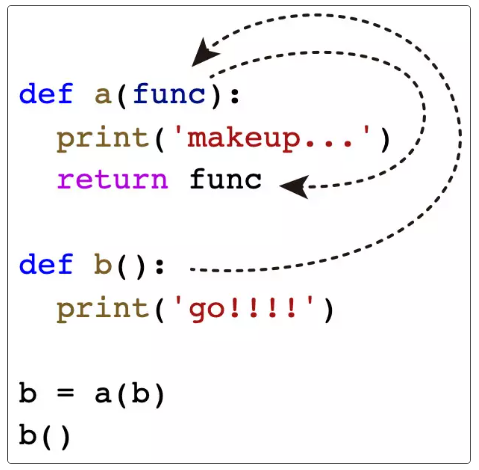

接著使用語法糖「@」包裝，就能達到簡化的效果。

In [ ]:
def a(func):
    print('makeup...')
    return func

# 裝飾器寫在 b 的前面，表示裝飾 b
@a
def b():
    print('go!!!!')

b()
# makeup...
# go!!!!

##### 多個裝飾器 
如果有多個裝飾器，執行的順序將會「由下而上」觸發 ( 函式一層層往上 )，下方的程式碼，會先裝飾 a3，接著裝飾 a2，最後裝飾 a1。

In [ ]:
def a1(func):
    print('1')
    return func

def a2(func):
    print('2')
    return func

def a3(func):
    print('3')
    return func

@a1
@a2
@a3
def b():
    print('go!!!!')

b()
# 3
# 2
# 1
# go!!!!

##### 單一參數處理 
如果裝飾器遇到帶有參數的函式，同樣能將參數一併帶入處理，實作的方式如下方程式碼，在裝飾器函式 a 裡，\
新增一個函式內的函式 c，並透過函式 c 來獲取被裝飾函式 b 的參數 msg。

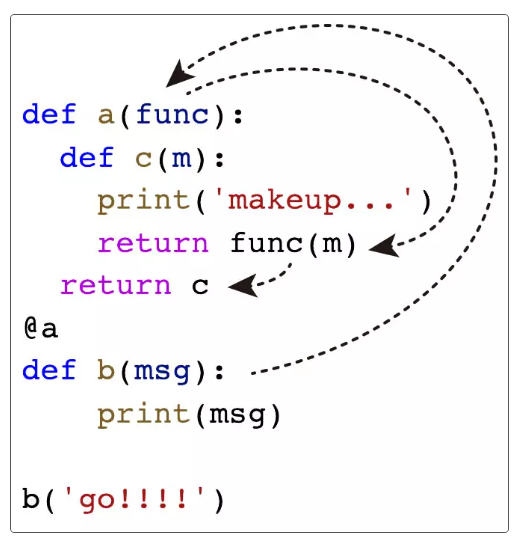

In [ ]:
def a(func):
    def c(m):             # 新增一個內部函式，待有一個參數
        print('makeup...')
        return func(m)      # 回傳 func(m)
    return c

@a
def b(msg):
    print(msg)

b('go!!!!')
# makeup...
# go!!!!

##### 多個參數處理 
如果遇到被裝飾的函式有多個參數，可以使用 *args 和 **kwargs 運算子來取得所有的參數，下方的例子，\
b 函式傳入的參數有串列以及帶有關鍵字引數的參數，就能將這些參數傳遞給裝飾器函式 a。

In [ ]:
def a(func):
    def c(*args, **kwargs):
        print(args)
        print(kwargs)
        print('ok...')
        return func(*args, **kwargs)
    return c

@a
def b(*args, **kwargs):
    print('go!!!!')

b([123, 456], x=1, y=2, z=3)

# ([123, 456],)
# {'x': 1, 'y': 2, 'z': 3}
# ok...
# go!!!!